In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

%matplotlib inline

In [229]:
df = pd.read_csv('data/201402_trip_data.csv', parse_dates=['start_date', 'end_date'])
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [230]:
df['month'] = df.start_date.apply(lambda x: x.month)
df['dayofweek'] = df.start_date.apply(lambda x: x.dayofweek)
df['day'] = df.start_date.apply(lambda x: x.day)
df['hour'] = df.start_date.apply(lambda x: x.hour)
df['date'] = df.start_date.apply(lambda x: x.date())

In [231]:
df

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,dayofweek,day,hour,date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,3,29,14,2013-08-29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,3,29,14,2013-08-29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,8,3,29,10,2013-08-29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,8,3,29,11,2013-08-29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,8,3,29,12,2013-08-29
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,8,3,29,18,2013-08-29
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,8,3,29,13,2013-08-29
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,8,3,29,14,2013-08-29
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,8,3,29,17,2013-08-29
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,8,3,29,11,2013-08-29


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 16 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null object
zip_code             137885 non-null object
month                144015 non-null int64
dayofweek            144015 non-null int64
day                  144015 non-null int64
hour                 144015 non-null int64
date                 144015 non-null object
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 17.6+ MB


In [233]:
agg = df.month.value_counts()
agg_sorted = agg.sort_index()
agg_sorted

1     24428
2     19024
8      2102
9     25243
10    29105
11    24219
12    19894
Name: month, dtype: int64

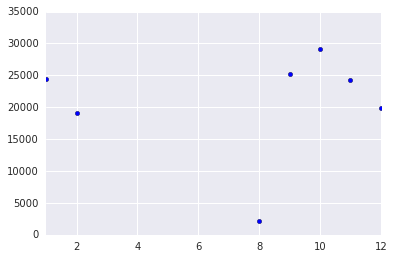

In [234]:
plt.scatter(agg_sorted.index, agg_sorted)
plt.xlim(1,12)
plt.show()

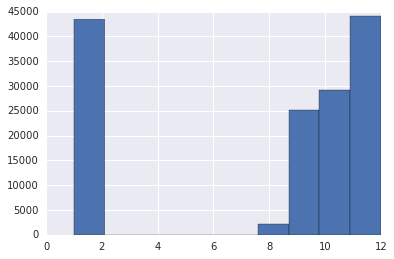

In [235]:
plt.hist(df.month)
plt.show()

In [236]:
df_sept_dec = df[df.month>8]
date_range = df_sept_dec.groupby(['month','day']).apply(len)
df_sept = df[df.month == 9]
df_oct = df[df.month == 10]
df_nov = df[df.month == 11]
df_dec = df[df.month == 12]

In [237]:
sept_vals = df_sept.day.value_counts().sort_index()
oct_vals = df_oct.day.value_counts().sort_index()
nov_vals = df_nov.day.value_counts().sort_index()
dec_vals = df_dec.day.value_counts().sort_index()

In [238]:
date_len = len(sept_vals.values) + len(oct_vals.values) + len(nov_vals.values) + len(dec_vals.values)
#date_range = np.arange(1,date_len+1,1)
#sept_range = date_range[:len(sept_vals.values)]
#oct_range = np.add(sept_range[1:len(oct_vals.values)+1], 
#                   np.ones(len(oct_vals.values))*len(oct_vals.values))




plt.plot(range(len(sept_vals.values)), sept_vals.values, 'bo-')
plt.plot(range(len(sept_vals.values), len(sept_vals.values)+len(oct_vals.values)), oct_vals.values, 'go-')
plt.plot(, nov_vals.values, 'ro-')
plt.plot(, dec_vals.values, 'yo-')

plt.show()
#print sept_range
#print oct_range

SyntaxError: invalid syntax (<ipython-input-238-39277f6b93cc>, line 12)

In [ ]:
fig = plt.figure(figsize=(12,8))
for month in range(9,13):
    holder = df[df.month == month].groupby('date').count()
    holder.trip_id.plot(ls='-', marker='o', alpha=0.5)

    
    
    
mean = df_sept_dec.date.value_counts().mean()
std = df_sept_dec.date.value_counts().std()

plt.axhline(mean + 1.5*std, color='gray', ls='--') 
plt.axhline(mean - 1.5*std, color='gray', ls='--')
plt.axhline(mean, color='gray', ls='-') 

plt.show()

In [ ]:
from scipy.stats.kde import gaussian_kde


df.date.value_counts().hist(normed=1)
my_pdf = gaussian_kde(df.date.value_counts())
x = np.linspace(0,1400,5000)
plt.plot(x, my_pdf(x))
plt.show()

In [ ]:
df_weekday = df[(df['dayofweek'] < 5)]  # | (df['dayofweek'] > 0)]
df_weekend = df[(df['dayofweek'] > 5)]  #| (df['dayofweek'] < 1)]

df_weekday.date.value_counts().hist(normed=1, color='b', bins=15, alpha=0.5)
my_pdf = gaussian_kde(df_weekday.date.value_counts())
x = np.linspace(0,1400,5000)
plt.plot(x, my_pdf(x), color='b', label='Weekday')

df_weekend.date.value_counts().hist(normed=1, color='g', bins=15, alpha=0.5)
my_pdf = gaussian_kde(df_weekend.date.value_counts())
x = np.linspace(0,1400,5000)
plt.plot(x, my_pdf(x), color='g', label='Weekend')
plt.legend()
plt.show()





In [ ]:
new_df = df.groupby(['date','hour']).count()

In [ ]:
#plt.plot(range(1,25), new_df, kind='box')


In [ ]:
df_counts = new_df.trip_id

In [ ]:
from collections import defaultdict

d = defaultdict(list)

for i, item in enumerate(df_counts):
    d[df_counts.index[i][1]].append(item)


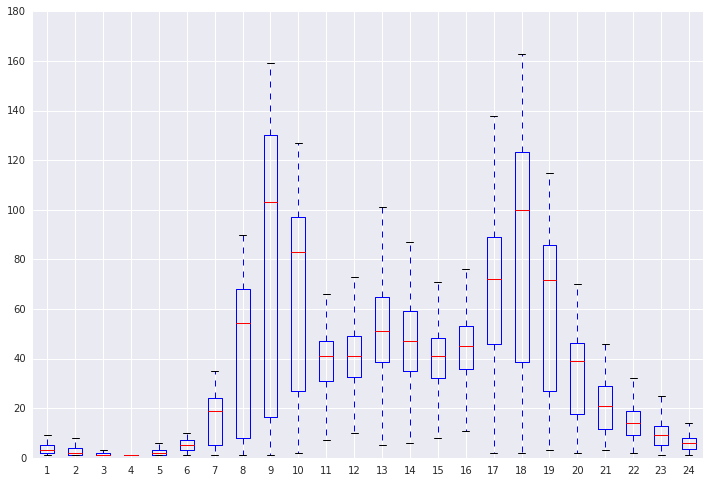

In [239]:
x = np.arange(1,25,1)

# for i in x:
#     plt.plot(d[i-1], kind='box')
# plt.show()

fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)

data_list = []
for i in x:
    data_list.append(d[i-1])
    
bp = ax.boxplot(data_list)
plt.show()

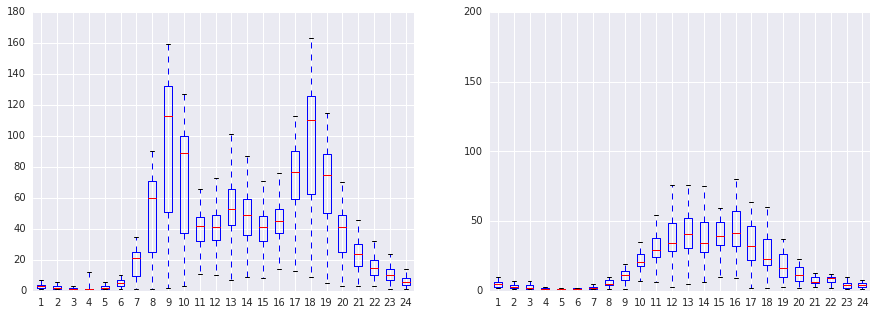

In [240]:
d_weekday = defaultdict(list)
d_weekend = defaultdict(list)

x = np.arange(1,25,1)

for i, item in enumerate(df_counts):
    if df_counts.index[i][0].weekday() < 6:
        d_weekday[df_counts.index[i][1]].append(item)
    else:
        d_weekend[df_counts.index[i][1]].append(item)

    
fig = plt.figure(1, figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data_list_wd = []
data_list_we = []

for i in x:
    data_list_wd.append(d_weekday[i-1])
    data_list_we.append(d_weekend[i-1])
    
bp1 = ax1.boxplot(data_list_wd)
bp2 = ax2.boxplot(data_list_we)
plt.ylim([0,200])

plt.show()

In [241]:
new_df = df.groupby(['subscription_type', 'date','hour']).count()

In [242]:
for i, item in enumerate(new_df.trip_id):
    print i, item

0 2
1 5
2 13
3 34
4 30
5 21
6 31
7 30
8 38
9 28
10 22
11 13
12 11
13 7
14 2
15 1
16 1
17 2
18 1
19 1
20 5
21 7
22 16
23 19
24 23
25 18
26 41
27 31
28 35
29 32
30 34
31 32
32 36
33 37
34 11
35 7
36 7
37 9
38 4
39 4
40 3
41 2
42 6
43 18
44 24
45 52
46 51
47 59
48 66
49 39
50 49
51 33
52 38
53 10
54 5
55 12
56 3
57 2
58 8
59 1
60 3
61 1
62 2
63 1
64 4
65 17
66 19
67 34
68 69
69 64
70 62
71 50
72 67
73 55
74 30
75 51
76 15
77 7
78 8
79 15
80 1
81 21
82 4
83 7
84 12
85 9
86 1
87 4
88 5
89 13
90 21
91 35
92 62
93 56
94 57
95 44
96 39
97 24
98 25
99 19
100 20
101 8
102 9
103 4
104 6
105 2
106 1
107 14
108 17
109 18
110 17
111 17
112 23
113 19
114 24
115 19
116 38
117 28
118 26
119 9
120 4
121 3
122 1
123 1
124 2
125 8
126 17
127 13
128 17
129 14
130 7
131 24
132 21
133 17
134 24
135 26
136 25
137 7
138 6
139 3
140 3
141 2
142 1
143 2
144 2
145 5
146 17
147 9
148 11
149 13
150 23
151 22
152 30
153 12
154 24
155 29
156 26
157 18
158 12
159 6
160 11
161 3
162 2
163 1
164 1
165 5
166 13
167 9
168

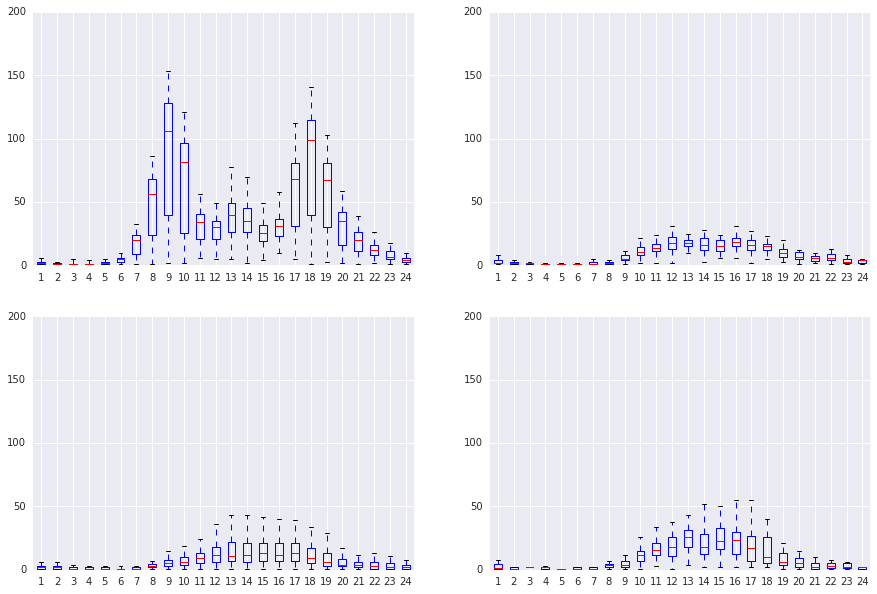

In [245]:
d_wd_cus = defaultdict(list)
d_wd_sub = defaultdict(list)
d_we_cus = defaultdict(list)
d_we_sub = defaultdict(list)

x = np.arange(1,25,1)

for i, item in enumerate(new_df.trip_id):
    if new_df.index[i][1].weekday() < 6 and new_df.index[i][0] == 'Subscriber':
        d_wd_sub[new_df.index[i][2]].append(item)
    
    elif new_df.index[i][1].weekday() < 6 and new_df.index[i][0] == 'Customer':
        d_wd_cus[new_df.index[i][2]].append(item)
    
    elif new_df.index[i][1].weekday() > 5 and new_df.index[i][0] == 'Subscriber':
        d_we_sub[new_df.index[i][2]].append(item)
    
    elif new_df.index[i][1].weekday() > 5 and new_df.index[i][0] == 'Customer':
        d_we_cus[new_df.index[i][2]].append(item)
    
    else:
        pass
    
fig = plt.figure(1, figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

data_list_wd_cus = []
data_list_we_cus = []
data_list_wd_sub = []
data_list_we_sub = []

for i in x:
    data_list_wd_cus.append(d_wd_cus[i-1])
    data_list_we_cus.append(d_we_cus[i-1])
    data_list_wd_sub.append(d_wd_sub[i-1])
    data_list_we_sub.append(d_we_sub[i-1])
    
    
bp1 = ax1.boxplot(data_list_wd_sub)
bp2 = ax2.boxplot(data_list_we_sub)
bp3 = ax3.boxplot(data_list_wd_cus)
bp4 = ax4.boxplot(data_list_we_cus)

ax1.set_ylim([0,200])
ax2.set_ylim([0,200])
ax3.set_ylim([0,200])
ax4.set_ylim([0,200])


#for flier in bp1['fliers']:
#    flier.set(marker='+')



plt.show()

In [246]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
y = prestige['prestige']
x = prestige[['income', 'education']].astype(float)

In [248]:
x['intercept'] = 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ec4290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b8d3e50>]], dtype=object)

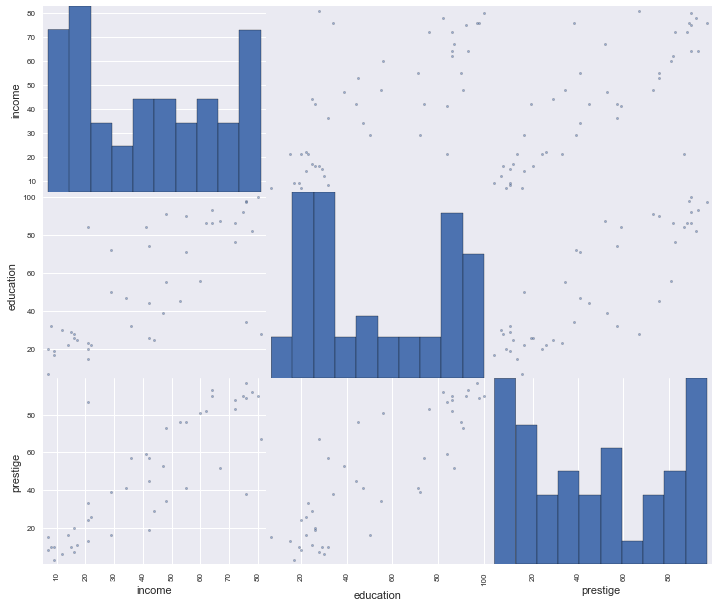

In [258]:
pd.scatter_matrix(prestige, figsize=(12,10))

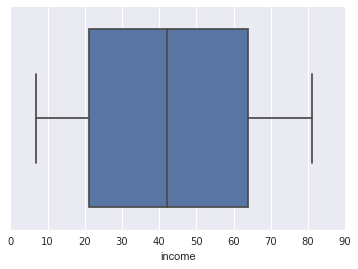

In [259]:
sns.boxplot(prestige.income)

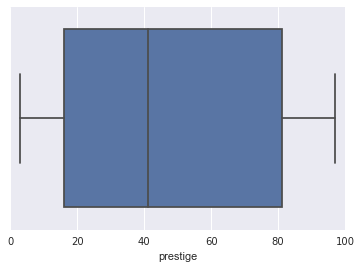

In [260]:
sns.boxplot(prestige.prestige)

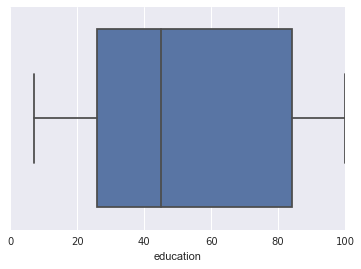

In [261]:
sns.boxplot(prestige.education)

In [269]:
np.linalg.inv(np.dot(x.T,x).dot(x.T, y.reshape(45,1)))

ValueError: output array is not acceptable (must have the right type, nr dimensions, and be a C-Array)

In [271]:
first = np.linalg.inv(np.dot(x.T,x))

In [272]:
second = np.dot(x.T, y)

In [275]:
np.dot(first, second.T)

array([ 0.59873282,  0.54583391, -6.06466292])

In [278]:
model = sm.OLS(y, x).fit()
summary = model.summary()

In [279]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 23 May 2016   Prob (F-statistic):           8.65e-17
Time:                        17:41:30   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
income         0.5987      0.120      5.003      0.000         0.357     0.840
education      0.5458      0.098      5.555      0.000         0.348     0.744
intercept     -6.0647      4.272     -1.420      0.163       -14.686     2.556
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""